In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn missingno

Exploratory Data Analysis

In [205]:
# importing necessary Llibraries: 
import pandas as pd # importing the dataframe and it is used for data cleaning and analysis. 
import numpy as np # used for working with arrays 
import seaborn as sns # used for plotting statistical graphics 
import matplotlib.pyplot as plt # used to create 2D graphs and plots 
import missingno as msno # used to visualize missing data in the dataset
import warnings # warnings module suppresses repeated warnings from the same source to cut down on the annoyance of seeing the same message over and over.
warnings.filterwarnings("ignore") # ignore warnings
from sklearn.preprocessing import Normalizer


In [206]:
# reading the dataset

df = pd.read_csv(r"D:\Guvi_Project\Household_energy_usage_forecast\individual+household+electric+power+consumption\household_power_consumption.txt", sep=';')

In [207]:
#dataset overview

df.info() # gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [208]:
df.head() # gives the first 5 rows of the dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [209]:
# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# set the index to be the Datetime column
df.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Parse date and time into separate features.
# Extract time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

# changing the datatype of the 'Global_active_power' column to float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# changing the datatype of the 'Global_reactive_power' column to float
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')

# changing the datatype of the 'Voltage' column to float
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# changing the datatype of the 'Global_intensity' column to float
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

# changing the datatype of the 'Sub_metering_1' column to float
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')

# changing the datatype of the 'Sub_metering_2' column to float
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [210]:
# gives the information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Hour                   int32  
 8   Day                    int32  
 9   Month                  int32  
 10  Weekday                int32  
dtypes: float64(7), int32(4)
memory usage: 158.3 MB


In [211]:
df.describe() # gives the statistical information about the dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,1.150076e+01,1.577363e+01,6.450359e+00,2.998909e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,6.922227e+00,8.787773e+00,3.415762e+00,2.000064e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,3.000000e+00,1.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,1.600000e+01,6.000000e+00,3.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01,2.300000e+01,9.000000e+00,5.000000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2.300000e+01,3.100000e+01,1.200000e+01,6.000000e+00


In [212]:
df.shape # gives the shape of the dataset

(2075259, 11)

In [213]:
df.head() # gives the first 5 rows of the dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday
Datetime,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,5
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,5
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,5
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,5


In [214]:
df.columns # gives the columns of the dataset

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Day', 'Month', 'Weekday'],
      dtype='object')

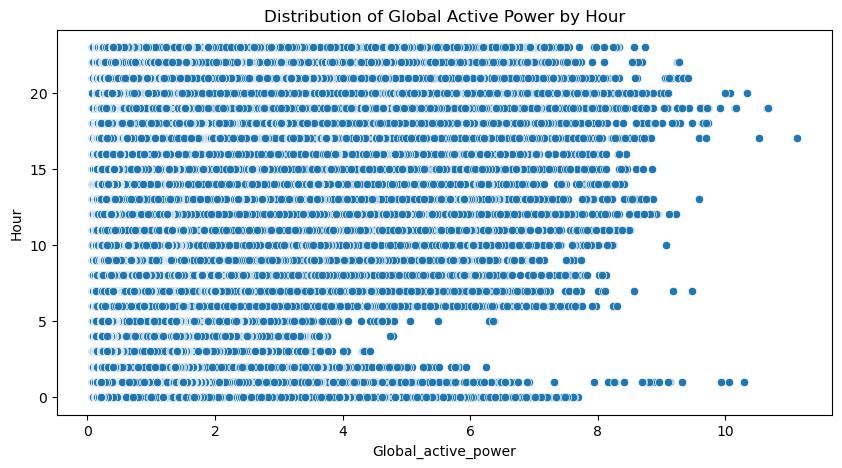

In [215]:
# visualizing the distribution of the peak power consumption by hourly basis
# here we can see that the peak power consumption is between 6pm to 9pm
# and the lowest power consumption is between 6am to 9am
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "Global_active_power", y ="Hour")
plt.title('Distribution of Global Active Power by Hour')
plt.show()

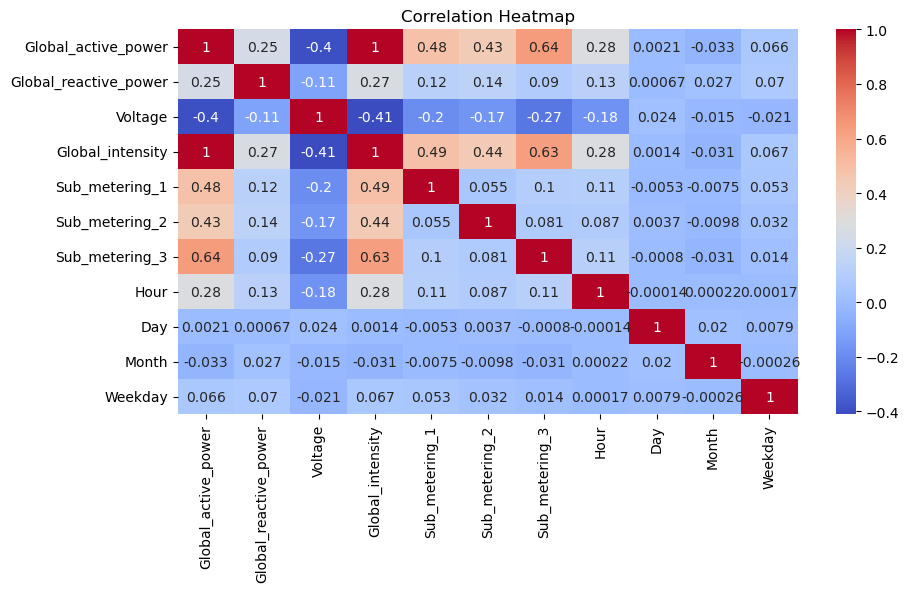

In [216]:
# visualizing the correlation between the features
# here we can see that the 'Global_intensity' and 'Global_active_power' are highly correlated
# and the 'Voltage' and 'Global_active_power' are negatively correlated
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing

<Axes: >

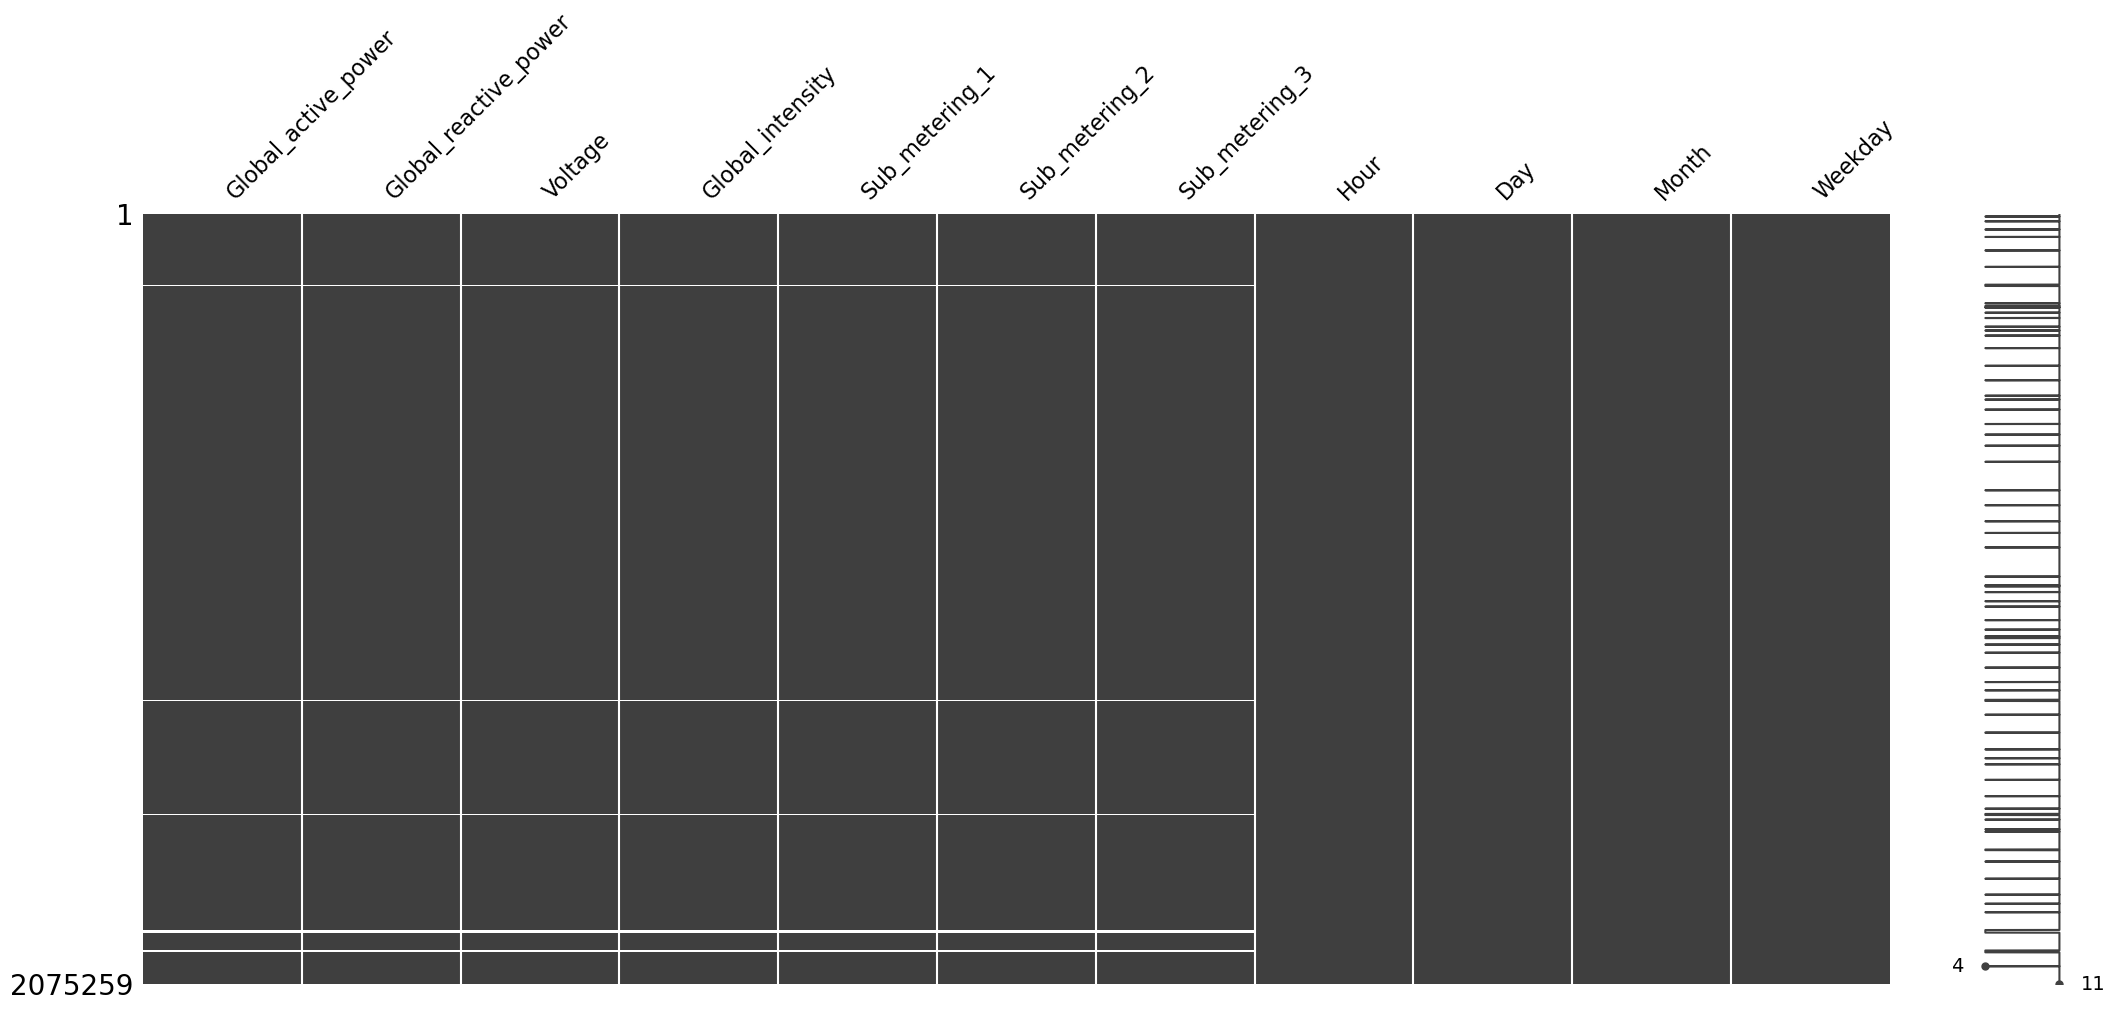

In [217]:
# checking for missing values in the dataset

msno.matrix(df) # gives the visualization of missing values in the dataset

In [218]:
# here we can see that there are missing values in the dataset other than the 'Date' and 'Time' columns
# I am going to fill the missing values with the mean of the respective columns and check the model performance. if it is not good then I need to use the alternative method to fill the missing values.
# Alternate method for missing numerical data : Ask client -> BA -> SME -> Mean -> Median -> Mode -> STD -> ffill -> bfill -> interolate -> KNN -> dropna.

# filling the missing values with the mean of the respective columns
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df.isnull().sum() # gives the sum of null values in each column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
Day                      0
Month                    0
Weekday                  0
dtype: int64

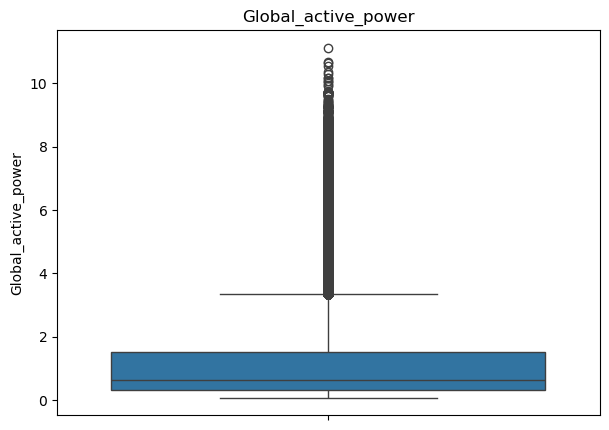

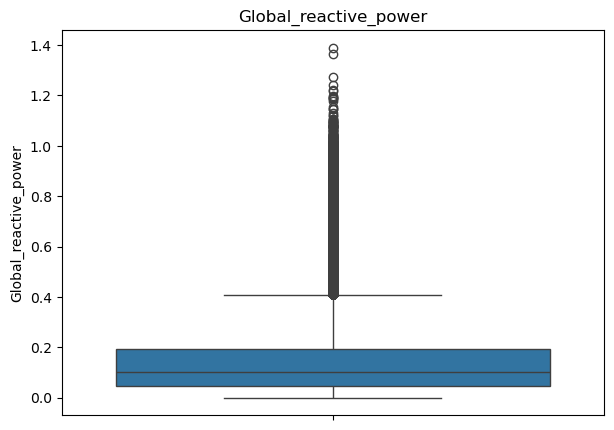

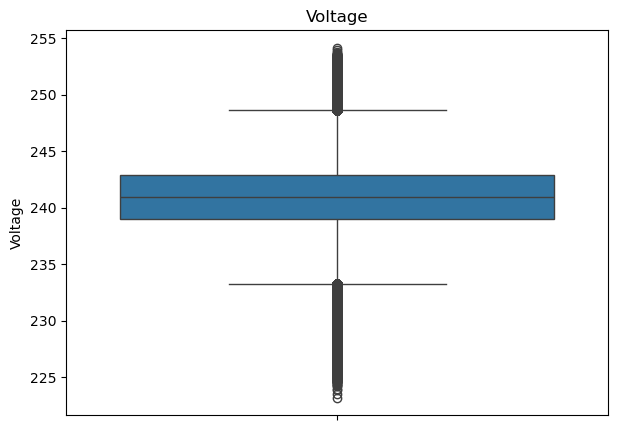

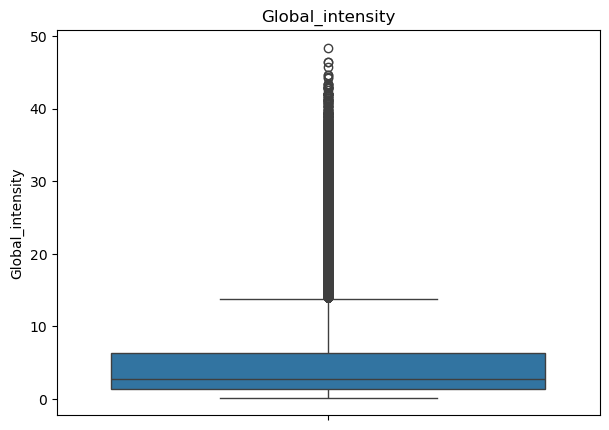

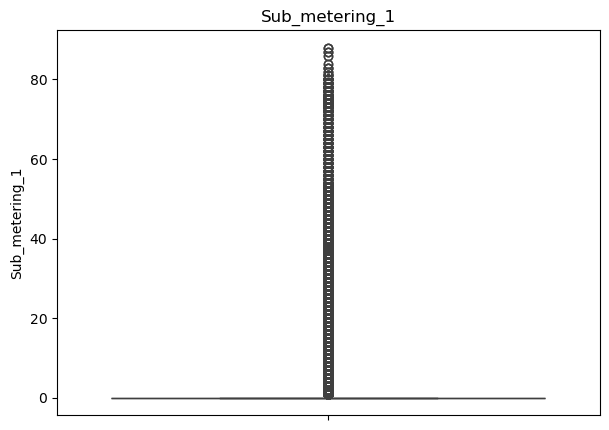

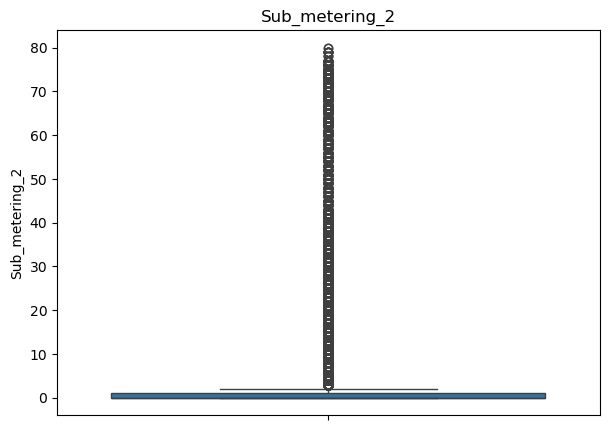

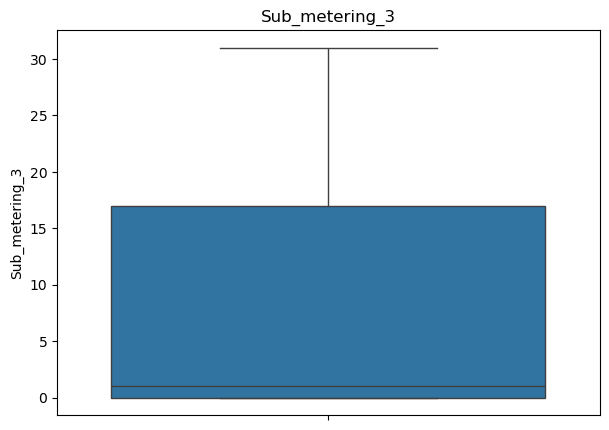

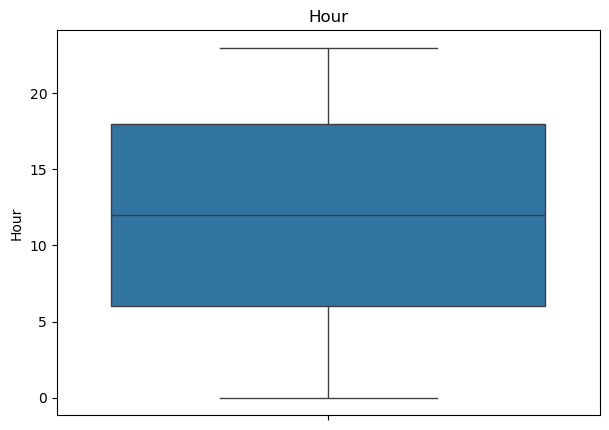

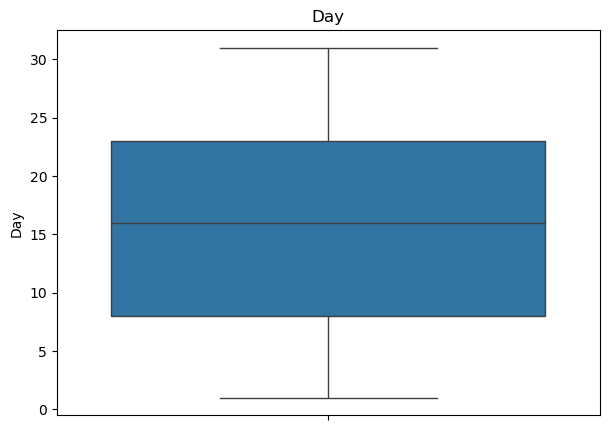

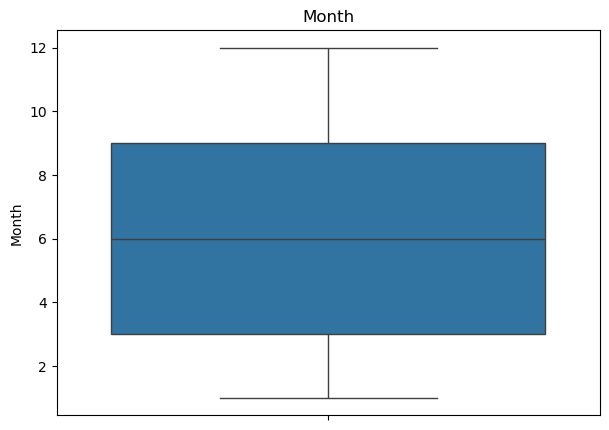

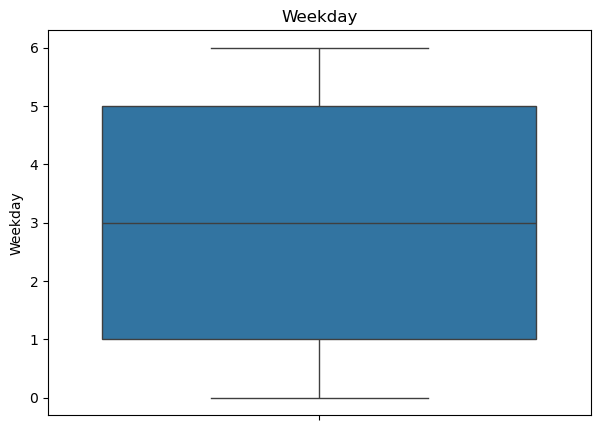

In [219]:
# checking for the outliers in the dataset
# boxplot is used to visualize the outliers in the dataset
# After visualizing the outliers we can decide whether to remove the outliers or not.
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

In [220]:
# Outliers are present in the dataset. I am going to use median to fill the outliers in the dataset.
# Alternate method for outliers in numerical data : Ask client -> BA -> SME -> Median -> ffill -> bfill -> interolate

df['Global_active_power'] = np.where(df['Global_active_power'] > df['Global_active_power'].quantile(0.9), df['Global_active_power'].median(), df['Global_active_power'])

df['Global_reactive_power'] = np.where(df['Global_reactive_power'] > df['Global_reactive_power'].quantile(0.9), df['Global_reactive_power'].median(), df['Global_reactive_power'])

# Get 10th and 90th percentiles
lower_bound = df['Voltage'].quantile(0.10)  # 10th percentile
upper_bound = df['Voltage'].quantile(0.90)  # 90th percentile
median_value = df['Voltage'].median()  # Median of the column

df['Voltage'] = np.where((df['Voltage'] < lower_bound) | (df['Voltage'] > upper_bound), median_value, df['Voltage'])

df['Global_intensity'] = np.where(df['Global_intensity'] > df['Global_intensity'].quantile(0.9), df['Global_intensity'].median(), df['Global_intensity'])

df['Sub_metering_1'] = np.where(df['Sub_metering_1'] > df['Sub_metering_1'].quantile(0.9), df['Sub_metering_1'].median(), df['Sub_metering_1'])

df['Sub_metering_2'] = np.where(df['Sub_metering_2'] > df['Sub_metering_2'].quantile(0.9), df['Sub_metering_2'].median(), df['Sub_metering_2'])


In [221]:
# using z-score to detect the outliers in the dataset
# z-score is used to detect the outliers in the dataset
# if the z-score is greater than 3 then it is an outlier

for col in df.columns:
    print(col)
    col_mean = df[col].mean()
    col_std = df[col].std()
    threshold = 3
    outliers = []
    for i in df[col]:
        z = (i - col_mean) / col_std
        if abs(z) > threshold:
            outliers.append(i)
    print(outliers)

Global_active_power
[]
Global_reactive_power
[]
Voltage
[]
Global_intensity
[]
Sub_metering_1
[]
Sub_metering_2
[]
Sub_metering_3
[]
Hour
[]
Day
[]
Month
[]
Weekday
[]


In [222]:
# Create additional features such as daily averages, peak hours, or rolling averages.


df['Daily_Avg_Power'] = df['Global_active_power'].resample('D').transform('mean')
df['Is_Peak_Hour'] = df['Hour'].apply(lambda x: 1 if (6 <= x <= 9) or (17 <= x <= 21) else 0)
df['Rolling_3H_Avg'] = df['Global_active_power'].rolling(window=3, min_periods=1).mean()
df['Rolling_24H_Avg'] = df['Global_active_power'].rolling(window=24, min_periods=1).mean()


In [ ]:
# Normalizing the dataset
# Normalization is used to scale the data of the dataset so that all the data points lie between 0 and 1.

scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
scaled_df.head()
# now we are going to use the scaled data for the model building

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday,Daily_Avg_Power,Is_Peak_Hour,Rolling_3H_Avg,Rolling_24H_Avg
0,0.002592,0.00042,0.991372,0.011520,0.0,0.004114,0.069942,0.069942,0.065828,0.049371,0.020571,0.004041,0.004114,0.002592,0.002592
1,0.002593,0.00042,0.991649,0.011523,0.0,0.004115,0.065847,0.069962,0.065847,0.049385,0.020577,0.004042,0.004115,0.002593,0.002593
2,0.002592,0.00042,0.991347,0.011520,0.0,0.008228,0.069941,0.069941,0.065826,0.049370,0.020571,0.004041,0.004114,0.002592,0.002592
3,0.002592,0.00042,0.991372,0.011520,0.0,0.004114,0.069942,0.069942,0.065828,0.049371,0.020571,0.004041,0.004114,0.002592,0.002592
4,0.002592,0.00042,0.991372,0.011520,0.0,0.004114,0.069942,0.069942,0.065828,0.049371,0.020571,0.004041,0.004114,0.002592,0.002592


Model Selection and Training: